In [14]:
import os, glob
import numpy as np
import xarray as xr
from enum import Enum
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

from glob import glob
import sys
import cartopy.crs as ccrs
sys.path.append('modules')
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import constants
import open_ds
sys.path.append(constants.MODULE_DIR)

In [7]:
os.listdir(constants.LONGRUNMIP_CONSECMET_DIR)

['51', 'window_51_length_500']

In [8]:
window = os.listdir(constants.LONGRUNMIP_CONSECMET_DIR)[1]
window

'window_51_length_500'

In [9]:
ROOT_DIR = os.path.join(constants.LONGRUNMIP_CONSECMET_DIR, window)
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500'

In [10]:
WINDOW = os.listdir(constants.LONGRUNMIP_CONSECMET_DIR)[1]
WINDOW

'window_51_length_500'

In [11]:
consec_nc_files =  glob(os.path.join(ROOT_DIR, 'consec_mets_*.nc'))
consec_nc_files

['/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_MPIESM12.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_IPSLCM5A.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_HadCM3L.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_FAMOUS.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_CNRMCM61.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_CESM104.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_GISSE2R.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_MPIESM11.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_CCSM3.nc']

In [12]:
nc_files_stable = glob(os.path.join(ROOT_DIR, '*sn_stable*.nc'))
nc_files_sn = glob(os.path.join(ROOT_DIR, '*sn_[!stable]*.nc'))
nc_files_sn

['/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/da_sn_CNRMCM61.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/da_sn_CESM104.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/da_sn_MPIESM12.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/da_sn_FAMOUS.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/da_sn_IPSLCM5A.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/da_sn_GISSE2R.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/da_sn_MPIESM11.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/da_sn_HadCM3L.nc',
 '/g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/da_sn_CCSM3.nc']

In [17]:
consec_ds = open_ds.open_and_concat_nc_files(consec_nc_files)
stable_ds = open_ds.open_and_concat_nc_files(nc_files_stable)
sn_ds = open_ds.open_and_concat_nc_files(nc_files_sn)

Opening /g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_MPIESM12.nc
Opening /g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_IPSLCM5A.nc
Removing coords - ['height']
Opening /g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_HadCM3L.nc
Opening /g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_FAMOUS.nc
Removing coords - ['height']
Opening /g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_CNRMCM61.nc
Removing coords - ['height']
Opening /g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_CESM104.nc
Opening /g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_GISSE2R.nc
Opening /g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/window_51_length_500/consec_mets_MPIESM11.nc
Opening /g/data/w40/ab2313/PhD/longrunmip/consecutive_metrics/

In [28]:
stable_ds

<xarray.Dataset>
Dimensions:          (time: 501, lon: 144, lat: 72, model: 9)
Coordinates:
  * time             (time) object 0000-12-31 00:00:00 ... 0500-12-31 00:00:00
  * lon              (lon) float64 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * lat              (lat) float64 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * model            (model) object 'IPSLCM5A' 'CNRMCM61' ... 'CESM104'
Data variables:
    signal_to_noise  (model, time, lat, lon) float64 nan nan ... 0.3137 0.3131
    lower_bound      (model, lat, lon) float64 -1.572 -1.567 ... -1.423 -1.429
    upper_bound      (model, lat, lon) float64 1.475 1.472 1.471 ... 2.102 2.096

In [36]:
sn_mean_da = sn_ds.mean(dim='model')['signal_to_noise']
stable_mean_da = stable_ds.mean(dim='model')['signal_to_noise']
sn_mean_da

<xarray.DataArray 'signal_to_noise' (time: 501, lat: 72, lon: 144)>
array([[[ 4.12821657e+00,  4.13060289e+00,  4.13128271e+00, ...,
          4.08062154e+00,  4.09330744e+00,  4.11516846e+00],
        [ 3.81345130e+00,  3.83127725e+00,  3.85819573e+00, ...,
          3.84132869e+00,  3.81714984e+00,  3.82675717e+00],
        [ 3.74755255e+00,  3.77030032e+00,  3.77003265e+00, ...,
          3.69674167e+00,  3.70326410e+00,  3.73470580e+00],
        ...,
        [ 4.38874708e+00,  4.36716373e+00,  4.33779961e+00, ...,
          4.39646679e+00,  4.40558355e+00,  4.40653662e+00],
        [ 4.45367178e+00,  4.44421250e+00,  4.43102710e+00, ...,
          4.46215693e+00,  4.46282088e+00,  4.46674993e+00],
        [ 4.47231609e+00,  4.47404250e+00,  4.47004033e+00, ...,
          4.47129493e+00,  4.47153669e+00,  4.47041883e+00]],

       [[ 4.05005931e+00,  4.05404025e+00,  4.05672989e+00, ...,
          3.99859403e+00,  4.01377093e+00,  4.03553067e+00],
        [ 3.63349824e+00,  3.64829929e+00,  3.69074056e+00, ...,
          3.67218692e+00,  3.64774766e+00,  3.65655545e+00],
        [ 3.53948677e+00,  3.55247237e+00,  3.57472810e+00, ...,
          3.49295096e+00,  3.50068970e+00,  3.52929223e+00],
...
        [ 3.18426125e-01,  3.15382951e-01,  3.01944717e-01, ...,
          3.37266050e-01,  3.35940087e-01,  3.33169742e-01],
        [ 2.86775840e-01,  2.73772095e-01,  2.75360724e-01, ...,
          3.11840533e-01,  3.14313357e-01,  2.99584884e-01],
        [ 2.31965528e-01,  2.26078907e-01,  2.20769304e-01, ...,
          2.47664240e-01,  2.43002733e-01,  2.37029248e-01]],

       [[ 6.33121645e-02,  7.00413207e-02,  7.26439185e-02, ...,
          6.15566674e-02,  6.35667579e-02,  6.40902899e-02],
        [ 2.57733903e-02,  4.93736054e-02,  4.74681350e-02, ...,
          1.64540740e-02,  2.32852495e-02,  2.58291730e-02],
        [-4.00771780e-02, -5.29794410e-02, -1.60128100e-02, ...,
         -6.19209157e-02, -7.27205273e-02, -4.74333667e-02],
        ...,
        [ 3.28893375e-01,  3.30658862e-01,  3.18035844e-01, ...,
          3.34702912e-01,  3.37219507e-01,  3.40649330e-01],
        [ 2.99497080e-01,  2.88295013e-01,  2.92173214e-01, ...,
          3.14204899e-01,  3.20201001e-01,  3.09819256e-01],
        [ 2.42140603e-01,  2.36943381e-01,  2.31712582e-01, ...,
          2.53559071e-01,  2.51110466e-01,  2.46186052e-01]]])
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0500-12-31 00:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75

In [42]:
unstable_mean_da = sn_mean_da.where(np.isnan(stable_mean_da))
unstable_mean_da

<xarray.DataArray 'signal_to_noise' (time: 501, lat: 72, lon: 144)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [3.8134513 , 3.83127725, 3.85819573, ..., 3.84132869,
         3.81714984, 3.82675717],
        [3.74755255, 3.77030032, 3.77003265, ..., 3.69674167,
         3.7032641 , 3.7347058 ],
        ...,
        [4.38874708, 4.36716373, 4.33779961, ..., 4.39646679,
         4.40558355, 4.40653662],
        [4.45367178, 4.4442125 , 4.4310271 , ..., 4.46215693,
         4.46282088, 4.46674993],
        [4.47231609, 4.4740425 , 4.47004033, ..., 4.47129493,
         4.47153669, 4.47041883]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [3.63349824, 3.64829929, 3.69074056, ..., 3.67218692,
         3.64774766, 3.65655545],
        [3.53948677, 3.55247237, 3.5747281 , ..., 3.49295096,
         3.5006897 , 3.52929223],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time     (time) object 0000-12-31 00:00:00 ... 0500-12-31 00:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75

# Plotting Funcionts

In [32]:
def plotting_function(da: xr.DataArray, time: str, da2:xr.DataArray = None, vmax = None, vmin=None, 
                     close=True) -> list:
    '''
    Takes a dataarray of lat and long (no time), and saves the single
    times slice in a directory called 'tmp'. Plot has coastlines.
    Parameters
    ----------
    da: xr.DataArray
    '''
    

    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    
    plot_kwargs = dict(vmin=vmin, vmax=vmax, cmap='Reds', extend='both')
    da.plot(ax=ax, **plot_kwargs)
    
    if isinstance(da2, xr.DataArray):
        da2.plot(ax=ax, alpha=0.4, **plot_kwargs)
    
    ax.set_title('year = '+ str(da.time.dt.year.values), fontsize=15)

    ax.coastlines()
    if close:
        plt.close(fig)
        index = str(time).zfill(3)
        print(index +  ' ,', end='')
        fig.savefig(os.path.join('tmp_2', index + '.png'))  

In [37]:
vmin = sn_mean_da.reduce(np.nanpercentile, q=1).values
vmax = sn_mean_da.reduce(np.nanpercentile, q=99).values
print(vmin, vmax)

-0.2127559192105248 3.9080318735528374


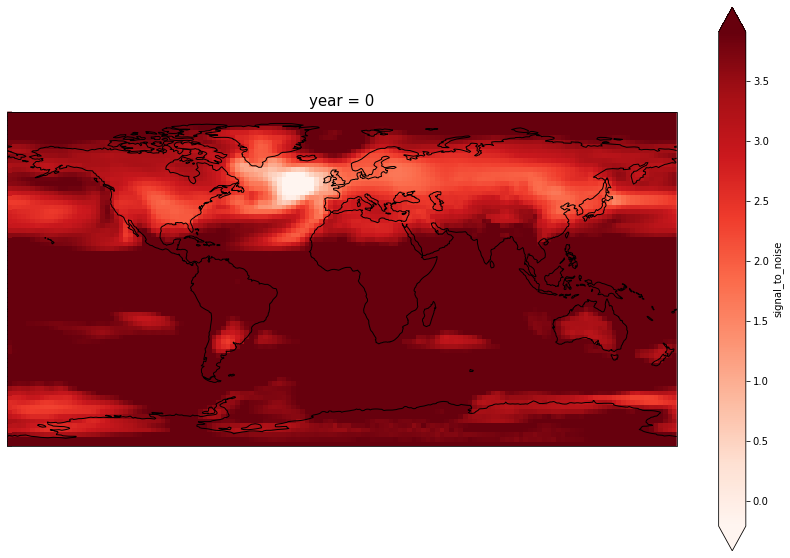

In [52]:
plotting_function(sn_mean_da.isel(time=0), time = 0, vmax = vmax, vmin=vmin, close=False)

In [229]:
for itime,time in enumerate(da_sn_mean.time.values):
    plotting_function(da_sn_mean.isel(time=itime), itime, vmax=vmax, vmin=vmin)

000 ,001 ,002 ,003 ,004 ,005 ,006 ,007 ,008 ,009 ,010 ,011 ,012 ,013 ,014 ,015 ,016 ,017 ,018 ,019 ,020 ,021 ,022 ,023 ,024 ,025 ,026 ,027 ,028 ,029 ,030 ,031 ,032 ,033 ,034 ,035 ,036 ,037 ,038 ,039 ,040 ,041 ,042 ,043 ,044 ,045 ,046 ,047 ,048 ,049 ,050 ,051 ,052 ,053 ,054 ,055 ,056 ,057 ,058 ,059 ,060 ,061 ,062 ,063 ,064 ,065 ,066 ,067 ,068 ,069 ,070 ,071 ,072 ,073 ,074 ,075 ,076 ,077 ,078 ,079 ,080 ,081 ,082 ,083 ,084 ,085 ,086 ,087 ,088 ,089 ,090 ,091 ,092 ,093 ,094 ,095 ,096 ,097 ,098 ,099 ,100 ,101 ,102 ,103 ,104 ,105 ,106 ,107 ,108 ,109 ,110 ,111 ,112 ,113 ,114 ,115 ,116 ,117 ,118 ,119 ,120 ,121 ,122 ,123 ,124 ,125 ,126 ,127 ,128 ,129 ,130 ,131 ,132 ,133 ,134 ,135 ,136 ,137 ,138 ,139 ,140 ,141 ,142 ,143 ,144 ,145 ,146 ,147 ,148 ,149 ,150 ,151 ,152 ,153 ,154 ,155 ,156 ,157 ,158 ,159 ,160 ,161 ,162 ,163 ,164 ,165 ,166 ,167 ,168 ,169 ,170 ,171 ,172 ,173 ,174 ,175 ,176 ,177 ,178 ,179 ,180 ,181 ,182 ,183 ,184 ,185 ,186 ,187 ,188 ,189 ,190 ,191 ,192 ,193 ,194 ,195 ,196 ,197 ,198 ,199 ,

In [230]:
def save_gif( files, gif_filename):
    frames = []
    for f in files:
        i = f
        new_frame = Image.open('tmp_2/' + i)
        frames.append(new_frame)

    frames[0].save(gif_filename, format='GIF',
        append_images=frames[1:],
        save_all=True,
        duration=.1, loop=0)

In [231]:
files = sorted(os.listdir('tmp_2'))
files[:10]

['000.png',
 '001.png',
 '002.png',
 '003.png',
 '004.png',
 '005.png',
 '006.png',
 '007.png',
 '008.png',
 '009.png']

In [233]:
gif_filename = f'my_gif_3.gif'
save_gif(files,gif_filename)

<img src="my_gif_3.gif" width="750" align="center">

<img src="my_gif_3.gif" width="750" align="center">